# 四家物体检测的API相比较
* **Object Detection API** 
* **baidu API**
* **Face++ API**
* **Azure API**

## ImageAI_ObjectDetectionAPI 对象检测
* 物体检测，提取和微调
* 优势：
    * 相对于其他物体检测API可以对检测对象进行提取和微调
    * 免费
* 劣势：
    * 且对象检测模型（由RetinaNet支持）ImageAI 只可以检测80种不同类型的对象。
    * 速度较慢，正常速度的识别较精准但是时间长达一分钟；若提升速度精准度相应也会降低。


In [10]:
from imageai.Detection import ObjectDetection
import os

execution_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath( os.path.join(execution_path , "resnet50_coco_best_v2.0.1.h5"))
detector.loadModel()
detector.loadModel(detection_speed="normal")#当检测速度为fast仅只识别到一个人

#对象检测并提取图像
detections, objects_path = detector.detectObjectsFromImage(input_image=os.path.join(execution_path , "school.jpeg"), output_image_path=os.path.join(execution_path , "image3new.jpg"), extract_detected_objects=True)
# 新参数（extract_detected_objects=True）将会把检测到的对象提取并保存为单独的图像；这将使函数返回2个值，第一个是字典数组，每个字典对应一个检测到的对象信息（包含对象类名和概率），第二个是所有提取出对象的图像保存路径，并且它们按照对象在第一个数组中的顺序排列。

In [11]:
for eachObject, eachObjectPath in zip(detections, objects_path):
    print(eachObject["name"])
    print("Object's image saved in " + eachObjectPath) #输出识别对象的截图存放路径
    print("--------------------------------")

tv
Object's image saved in /Users/rongrong/python/tensorflow/image3new.jpg-objects/tv-1.jpg
--------------------------------
person
Object's image saved in /Users/rongrong/python/tensorflow/image3new.jpg-objects/person-2.jpg
--------------------------------
person
Object's image saved in /Users/rongrong/python/tensorflow/image3new.jpg-objects/person-3.jpg
--------------------------------
person
Object's image saved in /Users/rongrong/python/tensorflow/image3new.jpg-objects/person-4.jpg
--------------------------------
person
Object's image saved in /Users/rongrong/python/tensorflow/image3new.jpg-objects/person-5.jpg
--------------------------------
person
Object's image saved in /Users/rongrong/python/tensorflow/image3new.jpg-objects/person-6.jpg
--------------------------------
vase
Object's image saved in /Users/rongrong/python/tensorflow/image3new.jpg-objects/vase-7.jpg
--------------------------------
person
Object's image saved in /Users/rongrong/python/tensorflow/image3new.jpg-ob

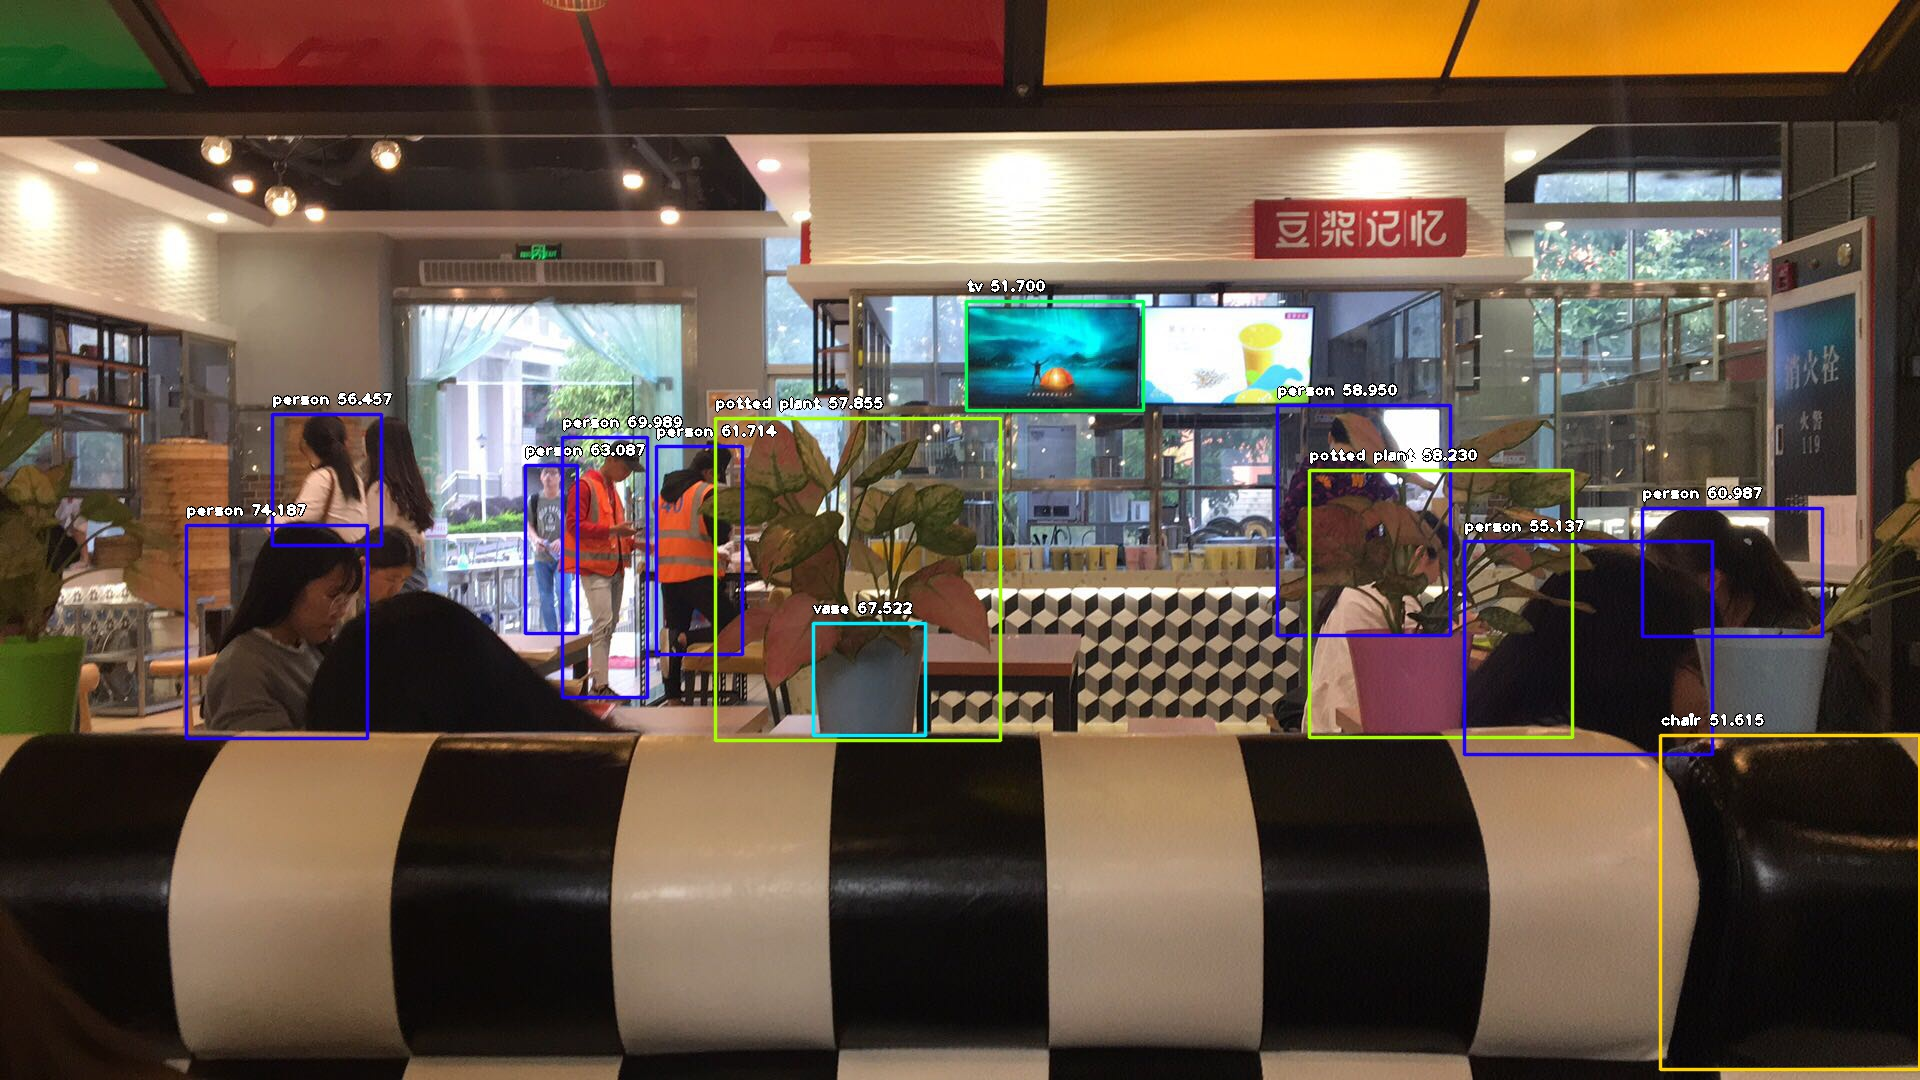

In [12]:
from IPython.display import Image

Image("image3new.jpg")

### 识别后截取并输出的图片如下：
![image_list](https://upload-images.jianshu.io/upload_images/14204282-3628d7946d559576.jpg?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

## baidu API
* 优势：输出中文，速度较快。
* 劣势：识别正确率最低。

In [13]:
from aip import AipImageClassify

""" 你的 APPID AK SK """
APP_ID = '********'
API_KEY = '*'
SECRET_KEY = '*'

client = AipImageClassify(APP_ID, API_KEY, SECRET_KEY)

""" 读取图片 """
def get_file_content(filePath):
    with open(filePath, 'rb') as fp:
        return fp.read()

image = get_file_content('image3new.jpg')

""" 调用通用物体识别 """
client.advancedGeneral(image);

""" 如果有可选参数 """
options = {}
options["baike_num"] = 5

""" 带参数调用通用物体识别 """
client.advancedGeneral(image, options)

{'log_id': 4566412722018507959,
 'result_num': 5,
 'result': [{'score': 0.709502,
   'root': '建筑-餐饮场所',
   'baike_info': {},
   'keyword': '餐饮场所'},
  {'score': 0.532799, 'root': '建筑-商店商场', 'baike_info': {}, 'keyword': '商店商场'},
  {'score': 0.501004,
   'root': '建筑-商店商场',
   'baike_info': {'baike_url': 'http://baike.baidu.com/item/%E5%95%86%E5%9C%BA/9887019',
    'image_url': 'http://imgsrc.baidu.com/baike/pic/item/6d81800a19d8bc3e207a214f888ba61ea9d345c0.jpg',
    'description': '商场，指聚集在一起的各种商店组成的市场，面积较大、商品比较齐全的大商店。如：廖仲恺《禁止商团联防总部成立布告》：“各埠商团之设，原为自卫商场。”'},
   'keyword': '商场'},
  {'score': 0.239782,
   'root': '商品-体育用品',
   'baike_info': {'baike_url': 'http://baike.baidu.com/item/%E6%B8%B8%E6%88%8F/33581',
    'image_url': 'http://imgsrc.baidu.com/baike/pic/item/359b033b5bb5c9ea30121e73df39b6003bf3b3b8.jpg',
    'description': '游戏是所有哺乳类动物，特别是灵长类动物学习生存的第一步。它是一种基于物质需求满足之上的，在一种特定时间、空间范围内遵循某种特定规则的，追求精神需求满足的社会行为方式。合理适度的游戏允许人类在模拟环境下挑战和克服障碍，可以帮助人类开发智力、锻炼思维和反应能力、训练技能、培养规则意识等，大型网络游戏还可以培养战略战术意识和团队精神

In [14]:
import pandas as pd 

data= client.advancedGeneral(image, options)

df = pd.DataFrame(data['result'])
df

,baike_info,keyword,root,score
0,{},餐饮场所,建筑-餐饮场所,0.709502
1,{},商店商场,建筑-商店商场,0.532799
2,{'baike_url': 'http://baike.baidu.com/item/%E5...,商场,建筑-商店商场,0.501004
3,{'baike_url': 'http://baike.baidu.com/item/%E6...,游戏,商品-体育用品,0.239782
4,{'baike_url': 'http://baike.baidu.com/item/%E9...,香烟,商品-香烟,0.006523


In [15]:
df['keyword']

0    餐饮场所
1    商店商场
2      商场
3      游戏
4      香烟
Name: keyword, dtype: object

## Face++_Detect Scene And Object API
* 调用者提供图片文件或者图片URL，进行图片分析，识别图片场景和图片主体。
* 优势：场景和物体会自动分类输出
* 劣势：精准度较低

In [16]:
# -*- coding: utf-8 -*-
import urllib.request
import urllib.error
import time

http_url = 'https://api-cn.faceplusplus.com/imagepp/beta/detectsceneandobject'
key = "*"
secret = "*"
filepath = r"image3new.jpg"

boundary = '----------%s' % hex(int(time.time() * 1000))
data = []
data.append('--%s' % boundary)
data.append('Content-Disposition: form-data; name="%s"\r\n' % 'api_key')
data.append(key)
data.append('--%s' % boundary)
data.append('Content-Disposition: form-data; name="%s"\r\n' % 'api_secret')
data.append(secret)
data.append('--%s' % boundary)
fr = open(filepath, 'rb')
data.append('Content-Disposition: form-data; name="%s"; filename=" "' % 'image_file')
data.append('Content-Type: %s\r\n' % 'application/octet-stream')
data.append(fr.read())
fr.close()
data.append('--%s' % boundary)
data.append('Content-Disposition: form-data; name="%s"\r\n' % 'return_landmark')
data.append('1')
data.append('--%s' % boundary)
data.append('Content-Disposition: form-data; name="%s"\r\n' % 'return_attributes')
data.append(
    "gender,age,smiling,headpose,facequality,blur,eyestatus,emotion,ethnicity,beauty,mouthstatus,eyegaze,skinstatus")
data.append('--%s--\r\n' % boundary)

for i, d in enumerate(data):
    if isinstance(d, str):
        data[i] = d.encode('utf-8')

http_body = b'\r\n'.join(data)

# build http request
req = urllib.request.Request(url=http_url, data=http_body)

# header
req.add_header('Content-Type', 'multipart/form-data; boundary=%s' % boundary)

try:
    # post data to server
    resp = urllib.request.urlopen(req, timeout=5)
    # get response
    qrcont = resp.read()
    # if you want to load as json, you should decode first,
    # for example: json.loads(qrount.decode('utf-8'))
    print(qrcont.decode('utf-8'))
except urllib.error.HTTPError as e:
    print(e.read().decode('utf-8'))

{"time_used": 1355, "scenes": [{"confidence": 63.804, "value": "Supermarkets"}], "image_id": "TfOJ9T6jGA44ZQYJz/v46Q==", "objects": [{"confidence": 20.526, "value": "TV"}], "request_id": "1545501608,c4748f56-4096-4b72-9bc8-b4940ce26d2d"}


In [17]:
data=eval(qrcont.decode('utf-8'))
scenes= data['scenes']+data['objects']
print(scenes)

[{'confidence': 63.804, 'value': 'Supermarkets'}, {'confidence': 20.526, 'value': 'TV'}]


## Azure-标记图像api

In [18]:
import requests
import matplotlib.pyplot as plt
import json
from PIL import Image
from io import BytesIO
import demjson
import pandas as pd 

# Replace <Subscription Key> with your valid subscription key.
subscription_key = "*"
assert subscription_key

vision_base_url = "http://api.cognitive.azure.cn/vision/v1.0/"

analyze_url = vision_base_url + "tag"

# Set image_url to the URL of an image that you want to analyze.
image_url = "https://upload-images.jianshu.io/upload_images/14204282-d2168c34274d01ab.jpeg?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240"

headers = {'Ocp-Apim-Subscription-Key': subscription_key }
params  = {'visualFeatures': 'Categories,Description,Color'}
data    = {'url': image_url}
response = requests.post(analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis = response.json()

data = demjson.encode(response.json())
text = demjson.decode(data)

# data['pois']是列表，含关键字搜索结果
# 大数据模块 pandas 简化输出 
df = pd.DataFrame(text['tags'])
df['name']
#列表推导
name = [x['name'] for x in text['tags']]
name

['indoor', 'person']

## 总结
* Google Object Detection API 
    * 格外的强大，同一张图片可以识别出14个对象并且进行截取储存，相比之下Azure_API在识别个数上较为不足。
    * 但是其劣势也比较明显，目前尝试的模型仅支持80种物体。之前尝试识别[老虎](http://f2.dn.anqu.com/orgin/NTkzNg==/allimg/120624/30-120624153613.jpg)因为不存在在类型对象中，所以返回的对象变成相差甚远的了“长颈鹿“（giraffe）。
    * 识别速度也比较慢，尽管可以调整检测速度(detection_speed)，但相对应的识别精准度也会下降很多，当检测速度调整为fast时同样是该[图片](https://upload-images.jianshu.io/upload_images/14204282-d2168c34274d01ab.jpeg?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240) 仅能识别到7个对象。
* 百度API
    * 识别效果垫底，肉眼可见不赘述
* Face++_Detect Scene And Object API
    * 相比之下，Face++的API精准度远不如Azure和谷歌的API，不仅将对象的空间误识别为超市（事实上是饭堂），数量上也并没有优势。

* 速度：百度>Azure>Face++>谷歌
* 精准度：谷歌>Azure>Face++>百度
* 价格（粗略判断）：Face++>Azure>百度>谷歌

    
* **结论**：因为Azure-标记图像的调用结果已经能满足用户的调用需求，而目前（力所能及之下）调用google Object Detection API的结果缺点过于明显，因此Azure-标记图像的API更加适用该产品。